In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tqdm.notebook import tqdm

In [3]:
import pandas as pd

In [4]:
import os, sys, re

In [5]:
regex = re.compile(r'\d+')

In [6]:
data_folder = os.path.join('/', 'Users','yw18581','Documents','leakage')

In [7]:
T0 = os.path.join(data_folder,'T0.1')
fname = os.path.join(T0, 'AVG_Tint1753440.tif')
im = plt.imread(fname)

200 120 1 3705
200 1120 2 3618
200 2270 3 4267
1200 120 4 3809
1200 1120 5 3598
1200 2270 6 3467
1950 120 7 3284
1950 1120 8 3036
1950 2270 9 2863


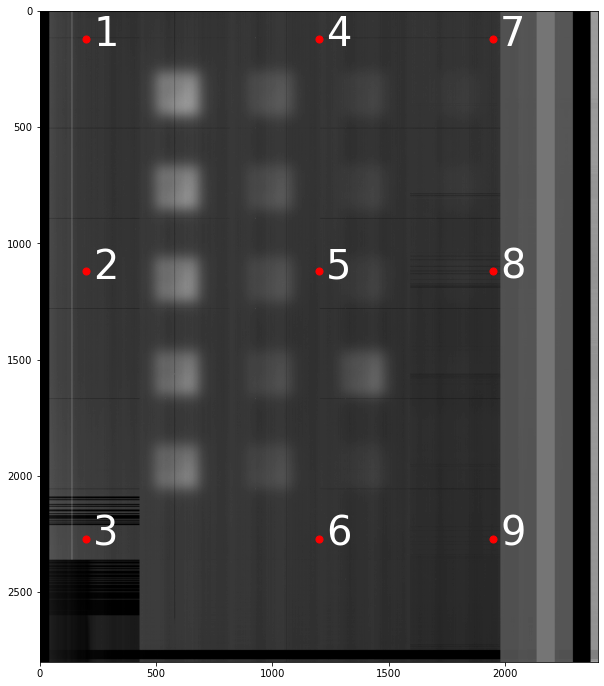

In [8]:
a0=200
a1=1000
a_shift = 750

a = [a0+ alpha*a1 + beta * a_shift for alpha,beta in zip([0,1,1], [0,0,1])]

b0=120
b1=1000
b_shift = 1150
b = [b0+alpha*b1+beta*b_shift for alpha,beta in zip([0,1,1], [0,0,1])]

rad_dam = [1, 2, 3, 4, 5, 6, 7, 8,9]

iter_rad_dam = iter(rad_dam)

plt.figure(figsize=(10,15))
sensor = plt.imshow(im, cmap='gray')
#plt.xlim(0,2400)
#plt.ylim(0, 2800)
iter_rad_dam = iter(rad_dam)
for xa in a:
    for xb in b:
        label=next(iter_rad_dam)

        plt.scatter(xa, xb, c='red', s=50)
        plt.text(xa+30, xb+30,label , color='w', fontsize=40)
        print(xa, xb, label, im[xb, xa])

plt.savefig('nodamage_sensor_map.png')

In [9]:
extracted_folder = os.path.join(data_folder, 'extracted_nodamage')

In [10]:
fnames = os.listdir(extracted_folder)

In [11]:
Temps = []
Tints = []

In [12]:
for fname in fnames:
    split = fname.split('_')
    T = split[0]
    tint = split[1]
    Temps.append(float(T[1:]))
    Tints.append(int(regex.findall(tint)[0]))

In [13]:
np.unique(Temps)

array([-20. , -15. , -10. ,  -5. ,   0.1,   4.9,  10. ,  14.9,  20. ,
        24.8,  30. ])

In [14]:
np.unique(Tints)

array([ 1753440,  2454816,  3156192,  3857568,  4558944,  5260320,
        6663072,  6663702,  7364448,  8767200,  9468576, 10169952,
       10871328, 11572704, 13676832, 15780960, 21391968, 26301600,
       31912608, 33315360, 35068800, 52603224])

In [15]:
def sel_files(flist, ts=None):
    selected = []
    if len(ts)>0:
        for t in ts:
            for f in flist:
                if str(t) in f:
                    selected.append(f)
    return sorted(selected)
              

In [16]:
file_list = set(sel_files(fnames, ts = np.unique(Tints)))-set([])

In [17]:
pixels=[]

In [18]:
rad_dam = [1, 2, 3, 4, 5, 6, 7, 8, 9]
for f in file_list:
    print(f)
    te = float(f.split('_')[0][1:])
    tint = int(regex.findall(f.split('_')[1])[0])
    imported = np.load(os.path.join(extracted_folder,f), allow_pickle=True)['pixels']
    for i, f in enumerate(imported):
        iter_rad_dam = iter(rad_dam)
        for r in f:
            label=next(iter_rad_dam)
            #print(i, label, np.mean(r))
            pixels.append([i, label, np.mean(r), te, tint])

T-5.0_Tint13676832_sh10nodamage.npz
T4.9_Tint11572704_sh10nodamage.npz
T30.0_Tint2454816_sh10nodamage.npz
T4.9_Tint2454816_sh10nodamage.npz
T10.0_Tint13676832_sh10nodamage.npz
T14.9_Tint11572704_sh10nodamage.npz
T-10.0_Tint13676832_sh10nodamage.npz
T4.9_Tint21391968_sh10nodamage.npz
T4.9_Tint1753440_sh10nodamage.npz
T-15.0_Tint15780960_sh10nodamage.npz
T10.0_Tint7364448_sh10nodamage.npz
T14.9_Tint2454816_sh10nodamage.npz
T10.0_Tint10169952_sh10nodamage.npz
T-10.0_Tint26301600_sh10nodamage.npz
T24.8_Tint10169952_sh10nodamage.npz
T-10.0_Tint5260320_sh10nodamage.npz
T30.0_Tint8767200_sh10nodamage.npz
T4.9_Tint10871328_sh10nodamage.npz
T20.0_Tint10871328_sh10nodamage.npz
T0.1_Tint3857568_sh10nodamage.npz
T4.9_Tint15780960_sh10nodamage.npz
T-10.0_Tint11572704_sh10nodamage.npz
T20.0_Tint2454816_sh10nodamage.npz
T30.0_Tint6663702_sh10nodamage.npz
T-15.0_Tint26301600_sh10nodamage.npz
T20.0_Tint8767200_sh10nodamage.npz
T4.9_Tint6663072_sh10nodamage.npz
T-10.0_Tint31912608_sh10nodamage.npz
T0.1_

In [19]:
df = pd.DataFrame(pixels, columns=['f_nb','region','intensity', 'T', 'tint'])

In [20]:
df

,f_nb,region,intensity,T,tint
0,0,1,3260.2150,-5.0,13676832
1,0,2,3471.4250,-5.0,13676832
2,0,3,4046.0425,-5.0,13676832
3,0,4,3248.0700,-5.0,13676832
4,0,5,3374.0775,-5.0,13676832
...,...,...,...,...,...
232195,199,5,3600.6275,0.1,6663072
232196,199,6,3291.1025,0.1,6663072
232197,199,7,3025.7675,0.1,6663072
232198,199,8,3191.7800,0.1,6663072


In [21]:
averaged = df.groupby(['T', 'tint', 'region']).mean().reset_index()

In [22]:
averaged

,T,tint,region,f_nb,intensity
0,-20.0,1753440,1,99.5,3205.244187
1,-20.0,1753440,2,99.5,3330.148175
2,-20.0,1753440,3,99.5,3763.547838
3,-20.0,1753440,4,99.5,3143.309400
4,-20.0,1753440,5,99.5,3039.752237
...,...,...,...,...,...
1156,30.0,11572704,5,99.5,9660.229250
1157,30.0,11572704,6,99.5,4534.030913
1158,30.0,11572704,7,99.5,4126.452613
1159,30.0,11572704,8,99.5,5352.388812


In [23]:
averaged = averaged[['T','tint','region', 'intensity']]

In [24]:
averaged

,T,tint,region,intensity
0,-20.0,1753440,1,3205.244187
1,-20.0,1753440,2,3330.148175
2,-20.0,1753440,3,3763.547838
3,-20.0,1753440,4,3143.309400
4,-20.0,1753440,5,3039.752237
...,...,...,...,...
1156,30.0,11572704,5,9660.229250
1157,30.0,11572704,6,4534.030913
1158,30.0,11572704,7,4126.452613
1159,30.0,11572704,8,5352.388812


---

### new algorithm

In [25]:
def bad_pixel_mask(array):
    mean = np.mean(array)
    if np.any(array)<= mean-2000:
        bad = np.where(array<=mean-2000)[0]
        for pix in bad:
            if pix<len(array)-1:
                array[pix] = np.mean([array[pix-1], array[pix+1]])
            else:
                array[pix]=array[pix-1]
    if np.any(array)>= mean+2000:
        bad_up = np.where(array>=mean+2000)[0]
        for px in bad_up:
            if px<len(array)-1:
                array[px] = np.mean([array[px-1], array[px+1]])
            else:
                array[px] = array[px-1]
    return array


In [26]:
rad_dam = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
n_regions = len(rad_dam)
n_files = len(file_list)
rad_dam = np.tile(rad_dam, n_files).reshape(n_files, n_regions)

def ravel_nested(ax):
    return np.vstack(ax).reshape(n_regions, 400)

mean_pix_by_pix = np.empty((n_files,n_regions))
std_pix_by_pix = np.empty((n_files,n_regions))
temps = np.zeros((n_files,n_regions))
tints = np.zeros((n_files,n_regions))
for i,f in tqdm(enumerate(file_list), desc='file'):
    temps[i] = np.tile(float(f.split('_')[0][1:]),n_regions)
    tints[i] = np.tile(int(regex.findall(f.split('_')[1])[0]),n_regions)
    imported = np.load(os.path.join(extracted_folder,f), allow_pickle=True)['pixels']
    stacked = np.apply_along_axis(ravel_nested, 1, imported)
    corrected = np.apply_along_axis(bad_pixel_mask, 0, stacked)
    mean_pix_by_pix[i]= np.mean(np.mean(corrected, axis=0), axis=1)
    std_pix_by_pix[i]= np.mean(np.std(corrected, axis=0), axis=1)


df_new = pd.DataFrame({"T":temps.ravel(), "tint":tints.ravel(), 'region':rad_dam.ravel(), 
                   'pedestal': mean_pix_by_pix.ravel(), 'noise':std_pix_by_pix.ravel()})

file: 0it [00:00, ?it/s]

In [27]:
def select_fit(test_y):
    for i, y in enumerate(test_y):
        if y>=15000:
            break
    return i

In [28]:
def get_variables(df, skip=None):   
    slopes = []
    slope_errs = []
    inter_errs = []
    temperatures = []
    radiations = []
    intercepts = []
    for (T, r), group in df.groupby(['T', 'region']):

        xx = np.sort(np.array(group['tint']))
        yy = np.sort(np.array(group['pedestal']))
        cut = select_fit(yy)

        slope=None
        intercept=None
        if T>-30 and r >0:
            print(T,r)
            
            if cut>2:
                print('cut>2')

                p, V = np.polyfit(xx[:cut], yy[:cut], 1, cov=True)
                y_fit = p[0]*xx + p[1]
                intercept = p[1]
                slope=p[0]
                slope_err = V[0][0]
                inter_err = V[0][1]
            elif cut ==2:
                if skip:
                    pass
                else:
                    p, V = np.polyfit(xx[:cut+1], yy[:cut+1], 1, cov=True)
                    y_fit = p[0]*xx + p[1]

                    slope=p[0]
                    intercept=p[1]
                    slope_err = V[0][0]
                    inter_err = V[0][1]

            elif cut==1:
                if skip:
                    pass
                else:

                    x1 = xx[0]
                    x2 = xx[1]
                    y1 = yy[0]
                    y2 = yy[1]
                    m = (y1-y2)/(x1-x2)
                    q = (x1*y2 - x2*y1)/(x1-x2)
                    y_fit = m * xx + q
                    slope = m
                    intercept=q
                    slope_err = 0
                    inter_err = 0
            elif cut==0:
                if skip:
                    pass
                else:

                    #print(T, r, cut, np.max(yy))

                    p, V = np.polyfit(xx, yy, 1, cov=True)
                    y_fit = p[0]*xx + p[1]
                    slope = p[0]
                    intercept = p[1]
                    slope_err = V[0][0]
                    inter_err = V[0][1]

            print(T,r, cut, slope)


        slopes.append(slope)
        slope_errs.append(slope_err)
        inter_errs.append(inter_err)
        temperatures.append(T)
        radiations.append(r)
        intercepts.append(intercept)
            #plt.show()
        #    print('fit: ({:.6f} +/- {:.6f}) x + {:.6f} +/- {:.6f}'.format(p[0], np.sqrt(V[0][0]),p[1], np.sqrt(V[1][1])))
            #plt.savefig('T_{}_rad_dam_{}_slope_{:.6f}.png'.format(T, r, slope))

    radiations = np.array(radiations)
    temperatures = np.array(temperatures)
    slopes = np.array(slopes)
    intercepts = np.array(intercepts)
    slope_errs = np.array(slope_errs)
    inter_errs = np.array(inter_errs)
    return radiations, temperatures, slopes, intercepts, slope_errs, inter_errs

In [29]:
radiations, temperatures, slopes, intercepts, slope_errs, inter_errs = get_variables(df_new, skip=True) 

-20.0 1
cut>2
-20.0 1 12 5.146037318213e-06
-20.0 2
cut>2
-20.0 2 12 3.3931982888060434e-06
-20.0 3
cut>2
-20.0 3 12 1.8352235943562136e-06
-20.0 4
cut>2
-20.0 4 12 6.6695082459205906e-06
-20.0 5
cut>2
-20.0 5 12 3.1234579513557283e-06
-20.0 6
cut>2
-20.0 6 12 2.6672405303392997e-06
-20.0 7
cut>2
-20.0 7 12 4.240423845740945e-06
-20.0 8
cut>2
-20.0 8 12 5.319008947653429e-06
-20.0 9
cut>2
-20.0 9 12 2.8998901923632238e-06
-15.0 1
cut>2
-15.0 1 10 7.22486813398988e-06
-15.0 2
cut>2
-15.0 2 10 5.213055929545609e-06
-15.0 3
cut>2
-15.0 3 10 2.8219559038628615e-06
-15.0 4
cut>2
-15.0 4 10 1.0815382443657424e-05
-15.0 5
cut>2
-15.0 5 10 6.902126728755619e-06
-15.0 6
cut>2
-15.0 6 10 4.311765492707845e-06
-15.0 7
cut>2
-15.0 7 10 8.620944884371201e-06
-15.0 8
cut>2
-15.0 8 10 6.218917218507768e-06
-15.0 9
cut>2
-15.0 9 10 5.301148625207743e-06
-10.0 1
cut>2
-10.0 1 10 7.871025669670833e-06
-10.0 2
cut>2
-10.0 2 10 4.611977875634681e-06
-10.0 3
cut>2
-10.0 3 10 2.09423231924814e-06
-10.0 4
cu

/var/folders/n5/yy7zjcxs7j18r7lk83wftskc0000gp/T/ipykernel_36078/2555409565.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("leakage_nodamage_with_sensor.png")
/Users/yw18581/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


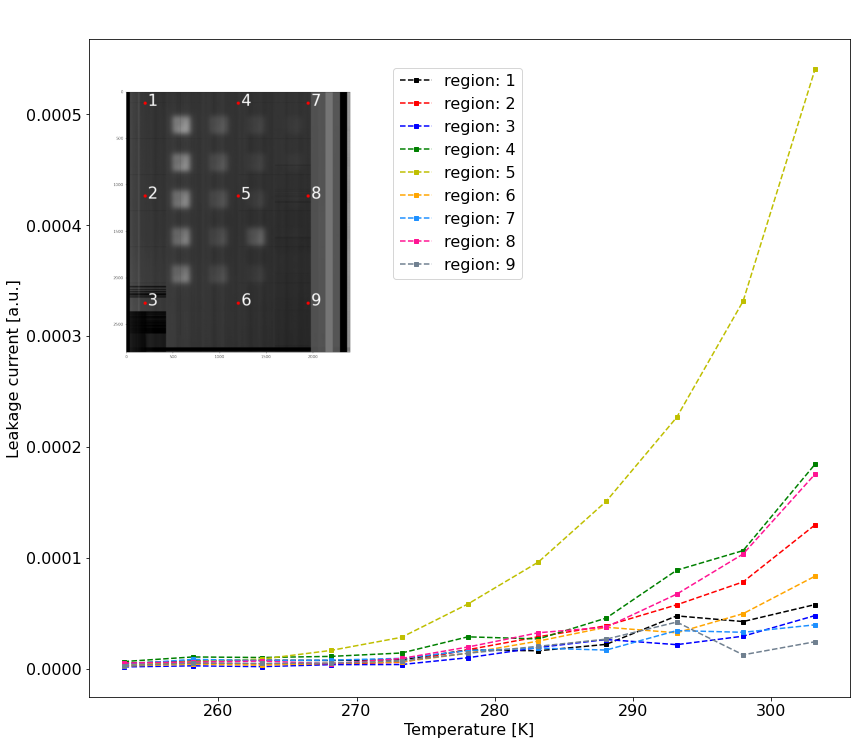

In [30]:
colors =['k','r','b','g','y','orange','dodgerblue','deeppink','slategrey','darkviolet','darkred']
cs = iter(colors)
#fig = plt.figure(figsize=(12,10))
plt.rcParams["figure.figsize"] = [12,10]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
sensor = plt.imread('nodamage_sensor_map.png')
for r in sorted(np.unique(radiations)):
    col = next(cs)
    ax.plot(temperatures[np.where(radiations==r)]+273.15, slopes[np.where(radiations==r)],'--s',markersize=4,
                c=col, label = 'region: {}'.format(r))
    ax.set_ylabel('Leakage current [a.u.]', size=16)
    ax.set_xlabel('Temperature [K]', size=16)

    #plt.ylim(0, 0.00075)
    #plt.title('Temperature: {} deg'.format(r), size=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, loc=(.4, .635))
newax = fig.add_axes([0.075, 0.43, .4, .6], zorder=1)
newax.imshow(sensor)
newax.axis('off')
plt.savefig("leakage_nodamage_with_sensor.png")
plt.show()    

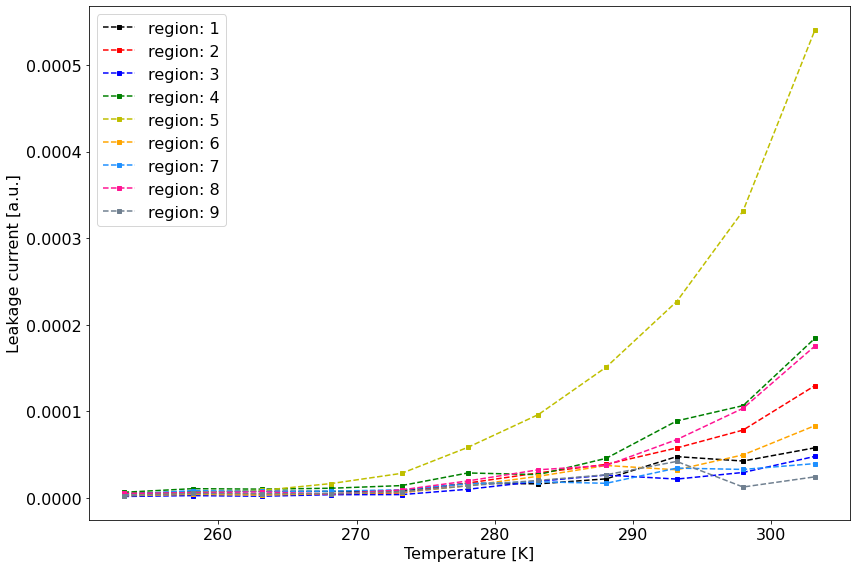

In [31]:
colors =['k','r','b','g','y','orange','dodgerblue','deeppink','slategrey','darkviolet','darkred']
cs = iter(colors)
fig, ax = plt.subplots(figsize=(12,8))
sensor = plt.imread('nodamage_sensor_map.png')
for r in sorted(np.unique(radiations)):
    col = next(cs)
    ax.plot(temperatures[np.where(radiations==r)]+273.15, slopes[np.where(radiations==r)],'--s',markersize=4,
                c=col, label = 'region: {}'.format(r))
    ax.set_ylabel('Leakage current [a.u.]', size=16)
    ax.set_xlabel('Temperature [K]', size=16)

    #plt.ylim(0, 0.00075)
    #plt.title('Temperature: {} deg'.format(r), size=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.savefig("leakage_nodamage_no_sensor.png")
plt.show() 

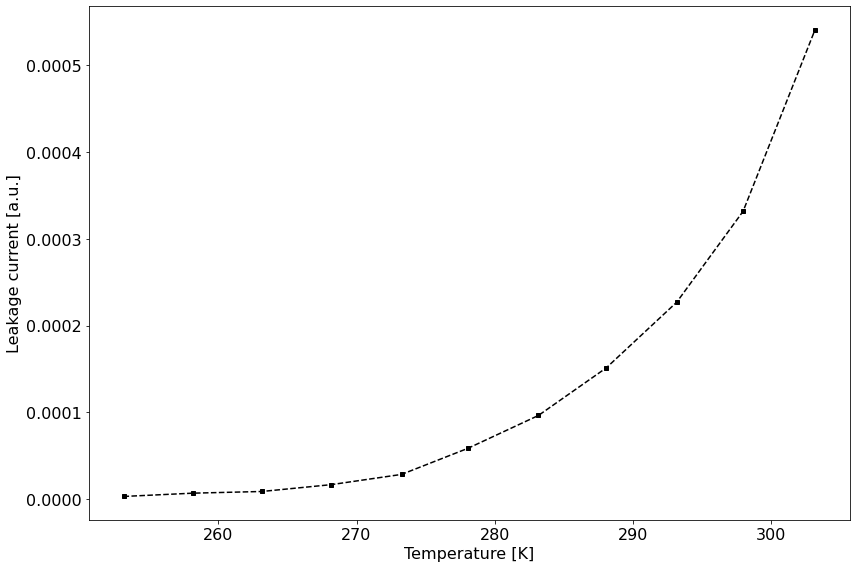

In [32]:
colors =['k','r','b','g','y','orange','dodgerblue','deeppink','slategrey','darkviolet','darkred']
cs = iter(colors)
fig, ax = plt.subplots(figsize=(12,8))

col = next(cs)
ax.plot(temperatures[np.where(radiations==5)]+273.15, slopes[np.where(radiations==5)],'--s',markersize=4,
            c=col, label = 'region: {}'.format(r))
ax.set_ylabel('Leakage current [a.u.]', size=16)
ax.set_xlabel('Temperature [K]', size=16)

    #plt.ylim(0, 0.00075)
    #plt.title('Temperature: {} deg'.format(r), size=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.legend(fontsize=16)
plt.savefig("leakage_nodamage_1_region.png")
plt.show() 

In [33]:
from scipy.optimize import curve_fit
import scipy

In [34]:
def function(x, a, b):
    k = scipy.constants.k
    return np.log(a) - (b/kb*x)

In [35]:
x, y = temperatures[np.where(radiations==5)]+273.15, slopes[np.where(radiations==5)]

In [36]:
kb = scipy.constants.physical_constants['Boltzmann constant in eV/K'][0]

In [37]:
#x_K = scipy.constants.convert_temperature(x, 'Celsius','Kelvin')

In [38]:
params, errs = curve_fit(function, x, np.log(y.ravel()), p0=[1, 0])

/var/folders/n5/yy7zjcxs7j18r7lk83wftskc0000gp/T/ipykernel_36078/2566270048.py:3: RuntimeWarning: invalid value encountered in log
  return np.log(a) - (b/kb*x)


In [39]:
min(x), max(x)

(253.14999999999998, 303.15)

In [40]:
xx = np.arange(min(x), max(x),1)

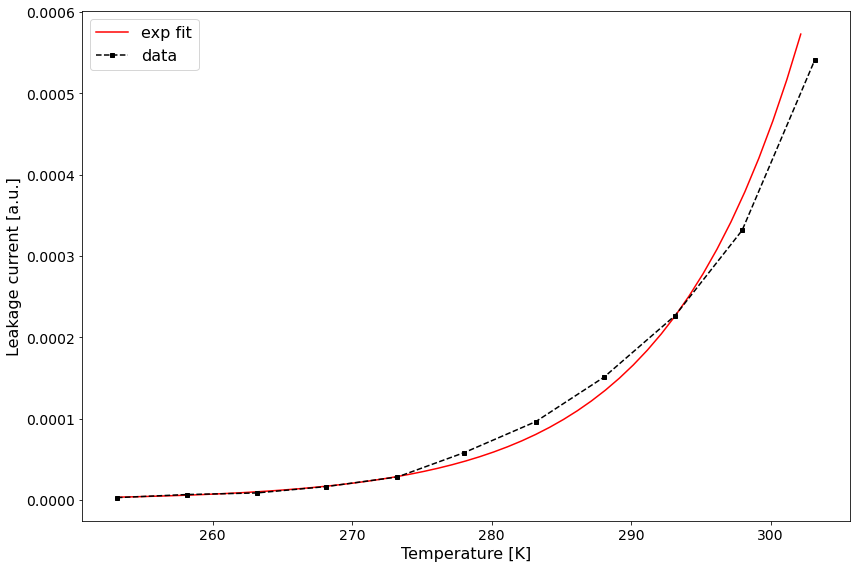

In [41]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(xx,  params[0]* np.exp(-params[1]/kb * xx),label='exp fit', c='red')
plt.plot(x, y, '--s',markersize=4,label='data', c='k')
plt.legend(loc='upper left', fontsize=16)
ax.set_ylabel('Leakage current [a.u.]', size=16)
ax.set_xlabel('Temperature [K]', size=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig("leakage_nodamage_1_region_fit.png")
plt.show()

In [42]:
params

array([ 1.67797665e-17, -8.88720074e-06])

In [43]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

In [52]:
model.fit(x.reshape(11,1), np.log(y.ravel()))

LinearRegression()

In [54]:
model.predict(x.reshape(11,1))

array([-12.51857259, -12.00291418, -11.48725577, -10.97159736,
       -10.44562578,  -9.9505937 ,  -9.42462212,  -8.91927688,
        -8.3933053 ,  -7.89827322,  -7.36198848])

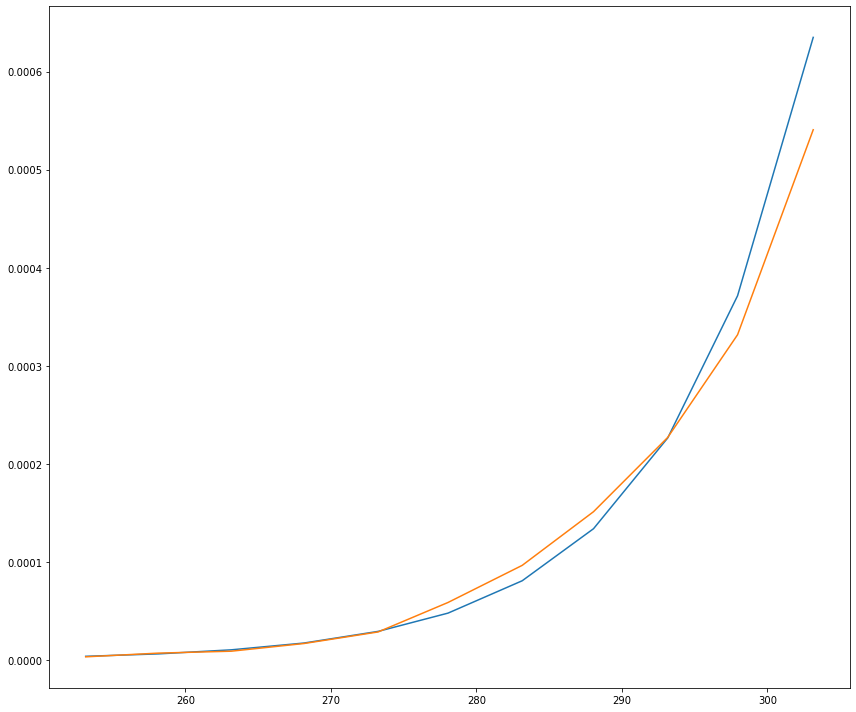

In [59]:
plt.plot(x, np.exp(model.predict(x.reshape(11,1))))
plt.plot(x, y)

In [61]:
model.coef_[0],model.intercept_

(0.10313168225831958, -38.626357953291944)

In [73]:
a, b = np.polyfit(x, np.log(y), 1, w=np.sqrt(y))

In [75]:
yfit = np.exp(b)*np.exp(a*x)

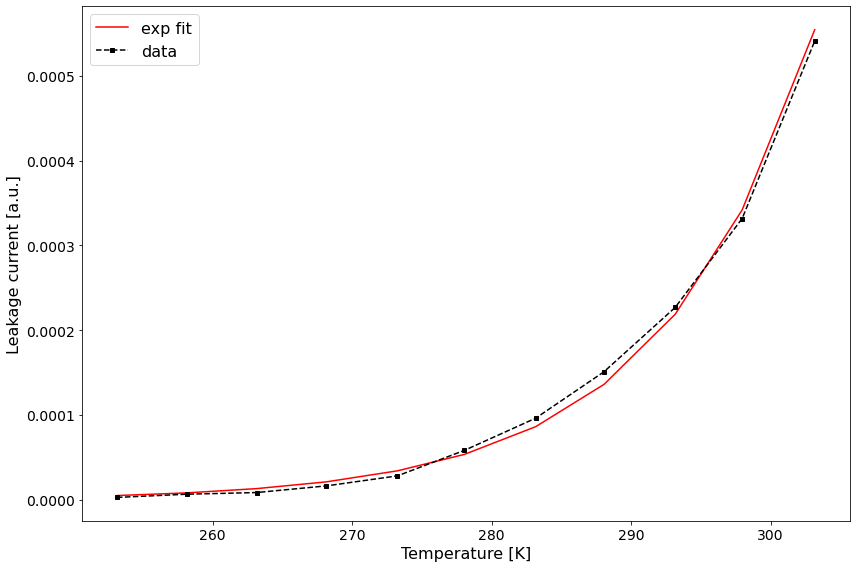

In [79]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(x, yfit,label='exp fit', c='red')
plt.plot(x, y, '--s',markersize=4,label='data', c='k')
plt.legend(loc='upper left', fontsize=16)
ax.set_ylabel('Leakage current [a.u.]', size=16)
ax.set_xlabel('Temperature [K]', size=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig("leakage_nodamage_1_region_fit2.png")
plt.show()

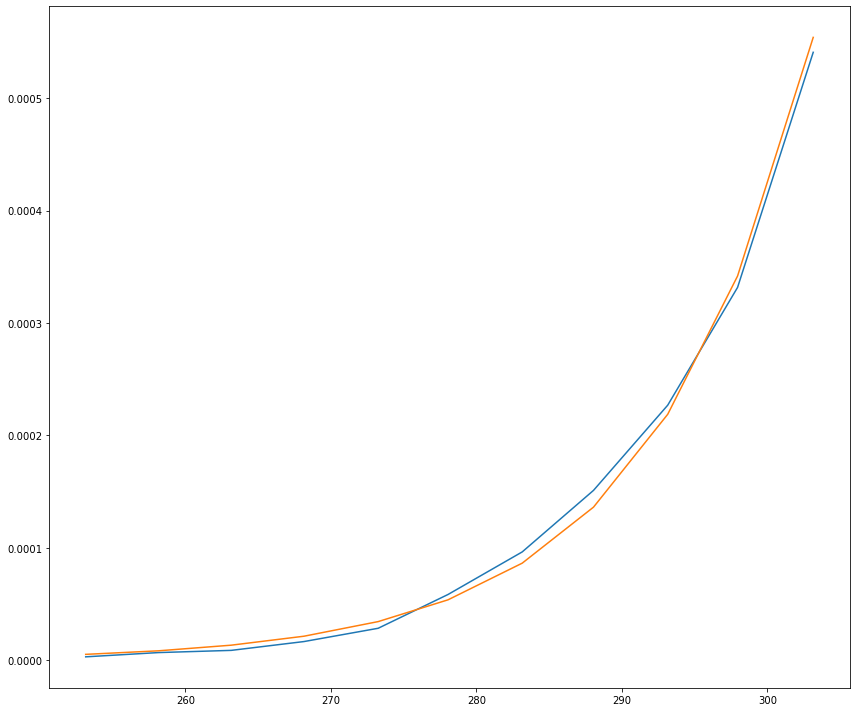

In [76]:
plt.plot(x, y)
plt.plot(x, yfit)

In [78]:
np.exp(b), np.exp(a)

(3.2573680313382496e-16, 1.0973500203687627)

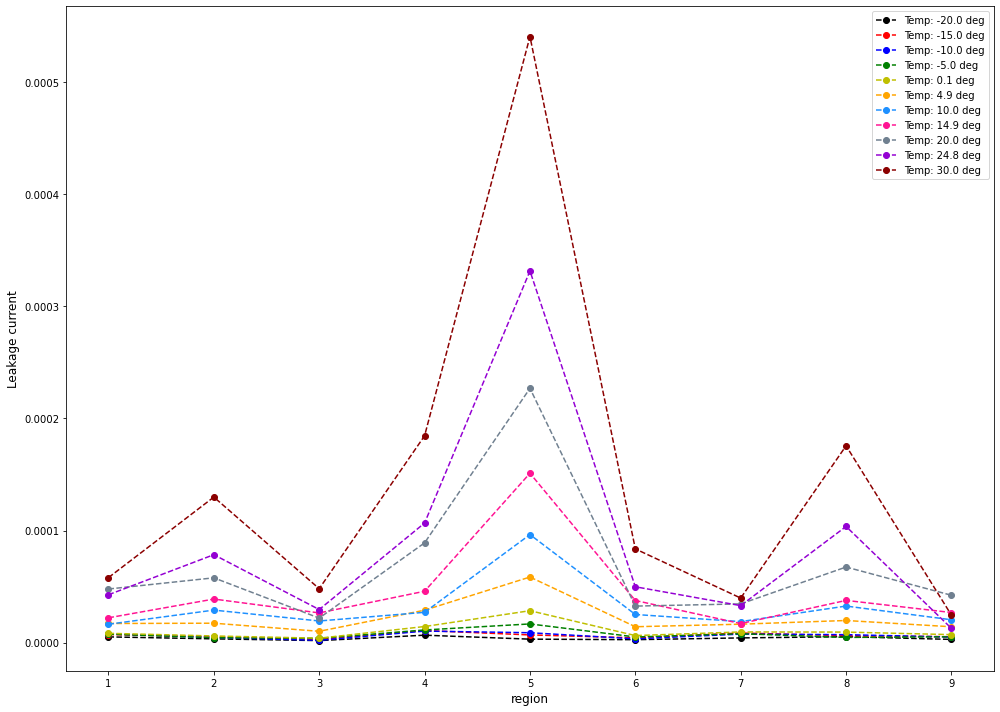

In [164]:
colors =['k','r','b','g','y','orange','dodgerblue','deeppink','slategrey','darkviolet','darkred']
cs = iter(colors)
plt.figure(figsize=(14,10))
for r in sorted(np.unique(temperatures)):
    col = next(cs)
    plt.plot(radiations[np.argwhere(temperatures==r)], slopes[np.argwhere(temperatures==r)],'--o',
                c=col, label = 'Temp: {} deg'.format(r))
    plt.ylabel('Leakage current', size=12)
    plt.xlabel('region', size=12)
    plt.legend(loc='upper right')
    #plt.ylim(0, 0.00075)
    #plt.title('Temperature: {} deg'.format(r), size=14)
plt.show()    
#plt.savefig('Slope_vs_T_nodamage'.format(r))

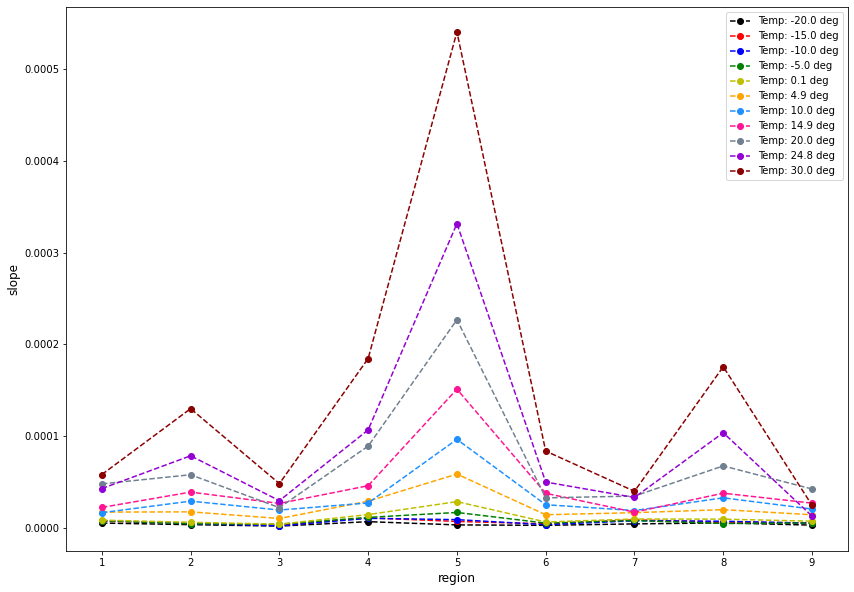

In [29]:
colors =['k','r','b','g','y','orange','dodgerblue','deeppink','slategrey','darkviolet','darkred']
cs = iter(colors)
plt.figure(figsize=(14,10))
for r in sorted(np.unique(temperatures)):
    col = next(cs)
    plt.plot(radiations[np.argwhere(temperatures==r)], slopes[np.argwhere(temperatures==r)],'--o',
                c=col, label = 'Temp: {} deg'.format(r))
    plt.ylabel('slope', size=12)
    plt.xlabel('region', size=12)
    plt.legend(loc='upper right')
    #plt.ylim(-0.0005, 0.0005)
    #plt.title('Temperature: {} deg'.format(r), size=14)
#plt.show()    
plt.savefig('Slope_vs_T_nodamage'.format(r))

In [169]:
df_new

,T,tint,region,pedestal,noise
0,0.1,15780960.0,1,3351.180175,12.651955
1,0.1,15780960.0,2,3578.153425,28.804374
2,0.1,15780960.0,3,4110.726300,11.085523
3,0.1,15780960.0,4,3456.772700,57.347065
4,0.1,15780960.0,5,3653.700500,34.765125
...,...,...,...,...,...
1156,10.0,5260320.0,5,3933.221475,35.730785
1157,10.0,5260320.0,6,3547.162013,46.272100
1158,10.0,5260320.0,7,3325.263525,17.192318
1159,10.0,5260320.0,8,3119.314200,355.497021


In [170]:
avg = df_new.groupby(['T', 'region', 'tint'], as_index=False).agg({'pedestal': ['mean', 'std']})

In [33]:
tints = []
Temps = []
rads = []
intensities = []
errors = []
for (T,r,t), group in avg[avg['region']<15][avg['T'].isin([-20.0, -10.0, 0.1, 10.0, 30.0])].groupby(['T', 'region', 'tint']):
    print(T,r,t, float(group[('pedestal','mean')]), float(group[('pedestal','std')]))
    Temps.append(T)
    tints.append(t)
    rads.append(r)
    intensities.append(float(group[('pedestal','mean')]))
    errors.append(float(group[('pedestal','std')]))

-20.0 1 1753440.0 3205.5412125 nan
-20.0 1 3857568.0 2990.68 nan
-20.0 1 5260320.0 3073.5958750000004 nan
-20.0 1 8767200.0 3025.9605000000006 nan
-20.0 1 10169952.0 3200.1419875000006 nan
-20.0 1 11572704.0 3065.0892 nan
-20.0 1 13676832.0 3041.2432 nan
-20.0 1 15780960.0 2995.83745 nan
-20.0 1 21391968.0 3137.9365125 nan
-20.0 1 26301600.0 3078.4998374999996 nan
-20.0 1 31912608.0 3046.0302125 nan
-20.0 1 33315360.0 3062.526975 nan
-20.0 1 35068800.0 3027.0568875 nan
-20.0 2 1753440.0 3330.1481750000003 nan
-20.0 2 3857568.0 3342.4058624999993 nan
-20.0 2 5260320.0 3296.4415625 nan
-20.0 2 8767200.0 3335.2715375 nan
-20.0 2 10169952.0 3344.598225 nan
-20.0 2 11572704.0 3291.12005 nan
-20.0 2 13676832.0 3210.2705499999997 nan
-20.0 2 15780960.0 3324.3132625000003 nan
-20.0 2 21391968.0 3349.9997749999998 nan
-20.0 2 26301600.0 3301.8060125 nan
-20.0 2 31912608.0 3257.1529375 nan
-20.0 2 33315360.0 3296.701325 nan
-20.0 2 35068800.0 3261.01265 nan
-20.0 3 1753440.0 3763.5478375000002 n

In [192]:
tints = []
Temps = []
rads = []
intensities = []
errors = []
for (T,r,t), group in avg[avg['region']<15].groupby(['T', 'region', 'tint']):
    print(T,r,t, float(group[('pedestal','mean')]), float(group[('pedestal','std')]))
    Temps.append(T)
    tints.append(t)
    rads.append(r)
    intensities.append(float(group[('pedestal','mean')]))
    errors.append(float(group[('pedestal','std')]))

-20.0 1 1753440.0 3205.5412125 nan
-20.0 1 3857568.0 2990.68 nan
-20.0 1 5260320.0 3073.5958750000004 nan
-20.0 1 8767200.0 3025.9605000000006 nan
-20.0 1 10169952.0 3200.1419875000006 nan
-20.0 1 11572704.0 3065.0892 nan
-20.0 1 13676832.0 3041.2432 nan
-20.0 1 15780960.0 2995.83745 nan
-20.0 1 21391968.0 3137.9365125 nan
-20.0 1 26301600.0 3078.4998374999996 nan
-20.0 1 31912608.0 3046.0302125 nan
-20.0 1 33315360.0 3062.526975 nan
-20.0 1 35068800.0 3027.0568875 nan
-20.0 2 1753440.0 3330.1481750000003 nan
-20.0 2 3857568.0 3342.4058624999993 nan
-20.0 2 5260320.0 3296.4415625 nan
-20.0 2 8767200.0 3335.2715375 nan
-20.0 2 10169952.0 3344.598225 nan
-20.0 2 11572704.0 3291.12005 nan
-20.0 2 13676832.0 3210.2705499999997 nan
-20.0 2 15780960.0 3324.3132625000003 nan
-20.0 2 21391968.0 3349.9997749999998 nan
-20.0 2 26301600.0 3301.8060125 nan
-20.0 2 31912608.0 3257.1529375 nan
-20.0 2 33315360.0 3296.701325 nan
-20.0 2 35068800.0 3261.01265 nan
-20.0 3 1753440.0 3763.5478375000002 n

In [193]:
tints = np.array(tints)
Temps = np.array(Temps)
rads = np.array(rads)
intensities = np.array(intensities)
errors = np.array(errors)

In [195]:
np.max(tints)

52603224.0

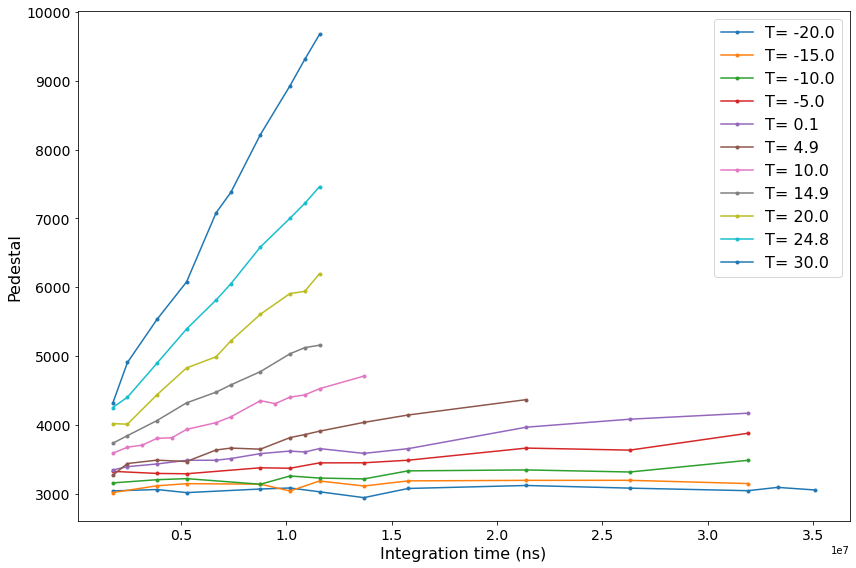

In [202]:
for r in [5]:
    plt.figure(figsize=(12,8))
    for t in np.unique(Temps):
        x = tints[np.argwhere(rads==r)][np.where(Temps[np.argwhere(rads==r)]==t)[0]]
        y = intensities[np.argwhere(rads==r)][np.where(Temps[np.argwhere(rads==r)]==t)[0]]
        plt.plot(x[x<52603224.0], y[np.where(x<52603224.0)],
                 'o-',markersize=3,
                label = 'T= {}'.format(t))
#plt.title('region: {}'.format(r))
plt.xlabel('Integration time (ns)', fontsize=16)
plt.ylabel('Pedestal', fontsize=16)
plt.legend(fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('pedestal_vs_tint_all_temperatures_nodamage.png'.format(r))

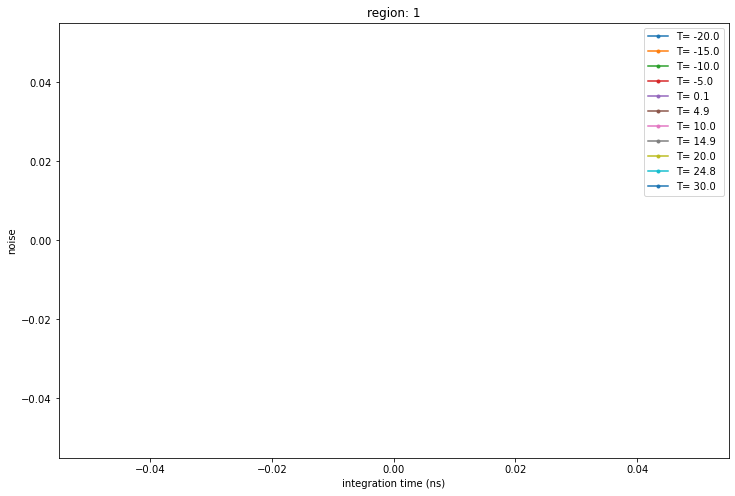

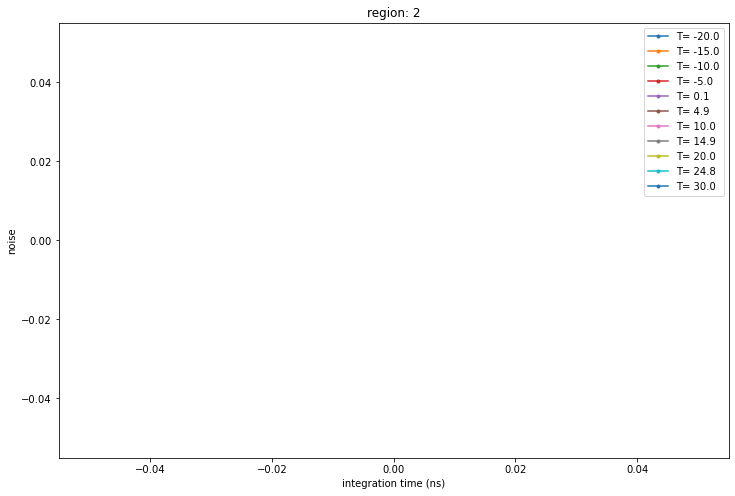

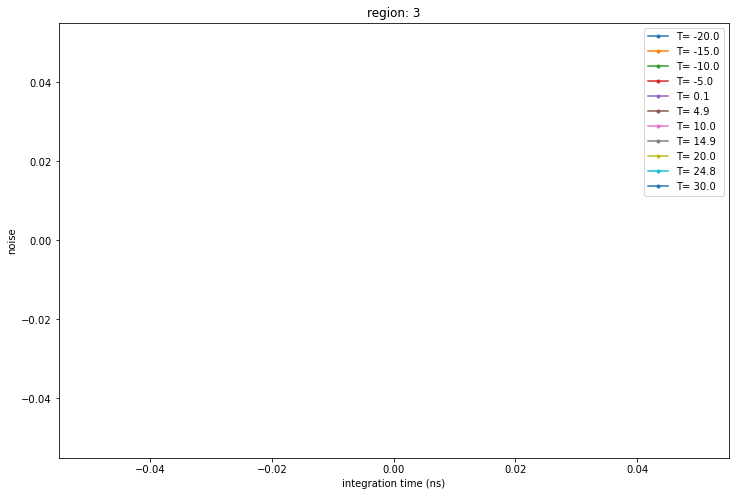

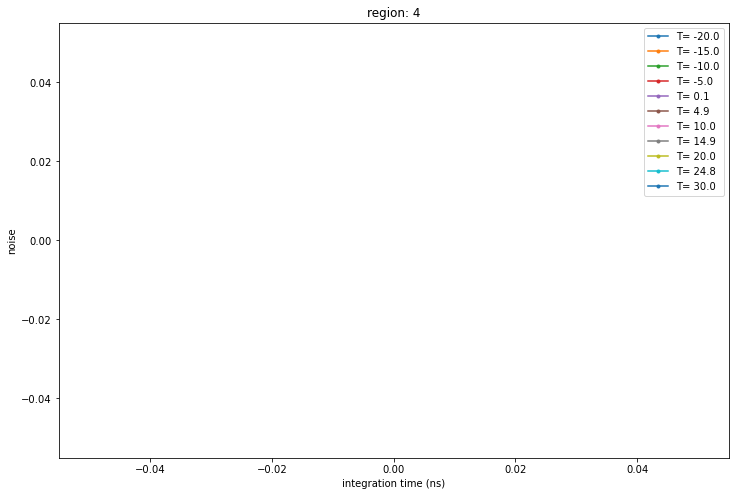

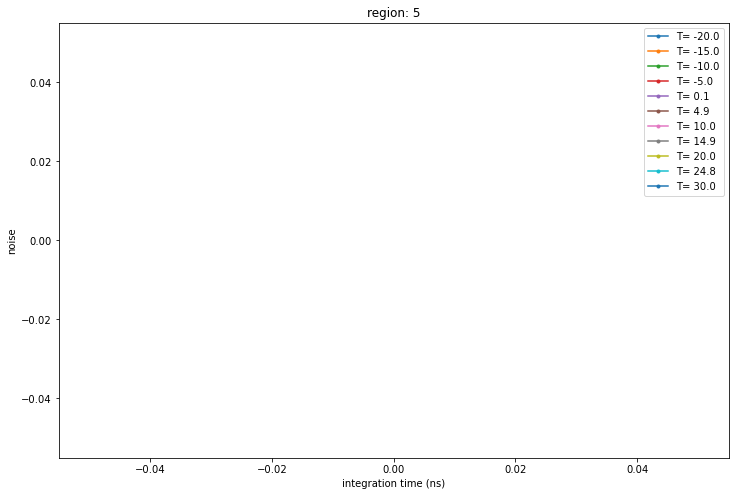

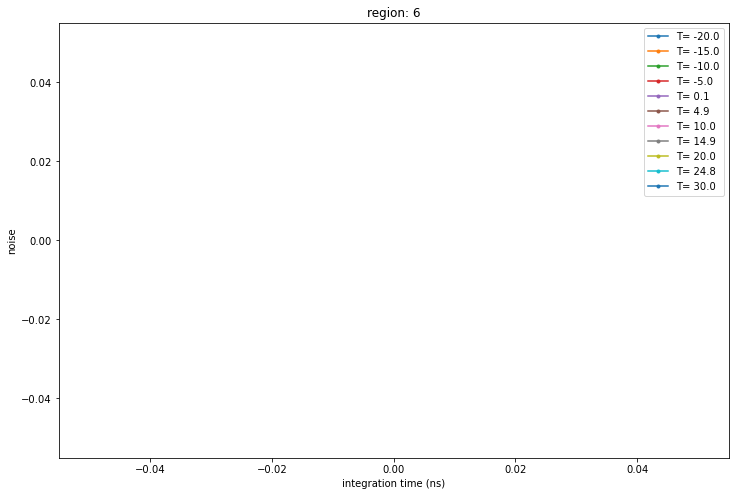

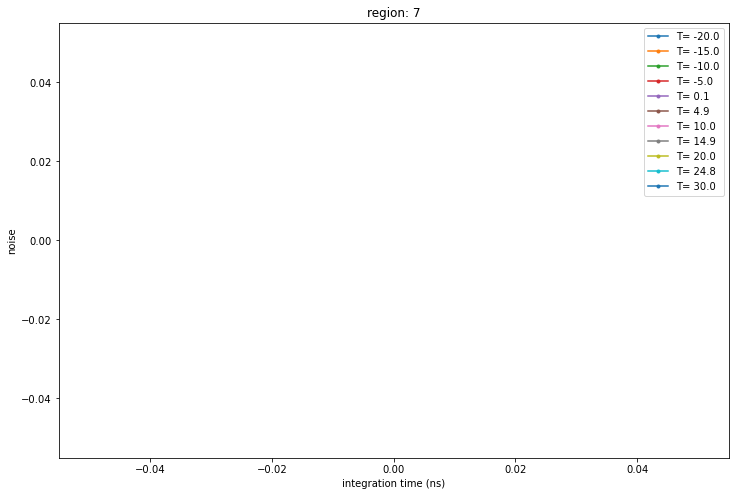

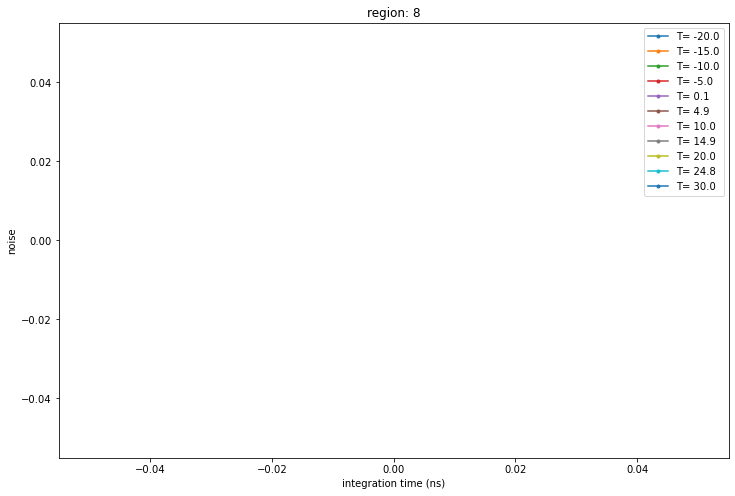

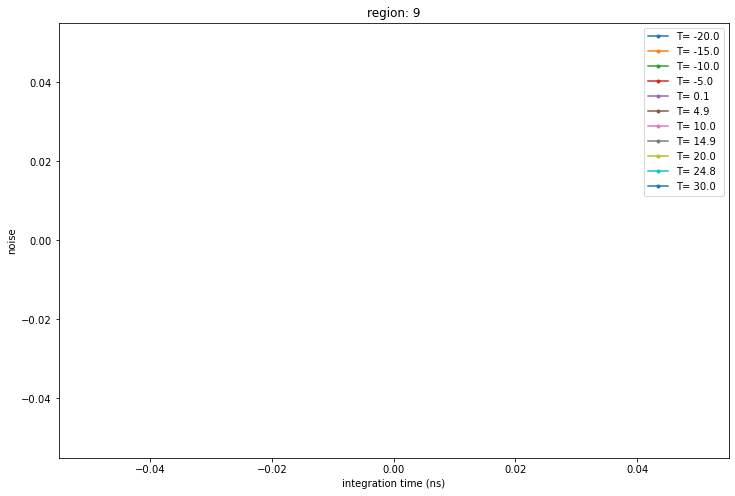

In [40]:
for r in np.unique(rads):
    plt.figure(figsize=(12,8))
    for t in np.unique(Temps):
        
        plt.plot(tints[np.argwhere(rads==r)][np.where(Temps[np.argwhere(rads==r)]==t)[0]], 
                 errors[np.argwhere(rads==r)][np.where(Temps[np.argwhere(rads==r)]==t)[0]],
                 'o-',markersize=3,
                label = 'T= {}'.format(t))
        plt.title('region: {}'.format(r))
        plt.xlabel('integration time (ns)')
        plt.ylabel('noise')
        #plt.ylim((0,400))
    plt.legend(loc='upper right')
    #plt.show()
    plt.savefig('noise_vs_tint_5_temperatures_{}nodamage.png'.format(r))

alternative

In [41]:

def ravel_nested(ax):
    return np.vstack(ax).reshape(9, 400)

mean_pix_by_pix = np.empty((129,9))
std_pix_by_pix = np.empty((129,9))
temps = np.zeros((129,9))
tints = np.zeros((129,9))

for i,f in tqdm(enumerate(file_list), desc='file'):
    temps[i] = np.tile(float(f.split('_')[0][1:]),9)
    tints[i] = np.tile(int(regex.findall(f.split('_')[1])[0]),9)
    imported = np.load(os.path.join(extracted_folder,f), allow_pickle=True)['pixels']
    stacked = np.apply_along_axis(ravel_nested, 1, imported)
    mean_pix_by_pix[i]= np.mean(np.mean(stacked, axis=0), axis=1)
    std_pix_by_pix[i]= np.mean(np.std(stacked, axis=0), axis=1)

file: 0it [00:00, ?it/s]

In [47]:
rad_dam = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

rad_dam = np.tile(rad_dam, 129).reshape(129, 9)

df = pd.DataFrame({"T":temps.ravel(), "tint":tints.ravel(), 'rad_dam':rad_dam.ravel(), 
                   'pedestal': mean_pix_by_pix.ravel(), 'noise':std_pix_by_pix.ravel()})



In [50]:
ttints = []
Temps = []
rads = []
intensities = []
errors = []
for (T,r,t), group in df[(df['region']<15) & (df['pedestal']<14000) & (df['T'].isin([-20.0, -15.0, -10.0,-5.0,  0.1, 10.0, 4.9, 10.0, 14.9,20.0,24.8,  30.0]))].groupby(['T', 'region', 'tint']):
    #print(T,r,t,float(group['noise']), float(group['pedestal']))
    Temps.append(T)
    ttints.append(t)
    rads.append(r)
    intensities.append(float(group['pedestal']))
    errors.append(float(group['noise']))
    

ttints = np.array(ttints)
Temps = np.array(Temps)
rads = np.array(rads)
intensities = np.array(intensities)
errors = np.array(errors)

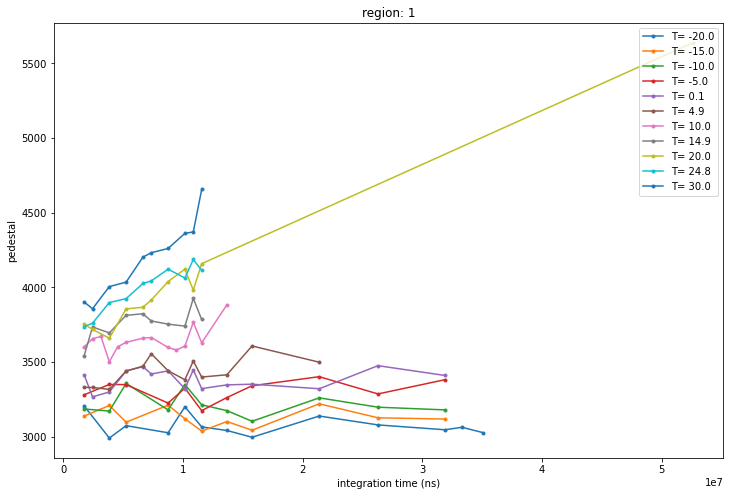

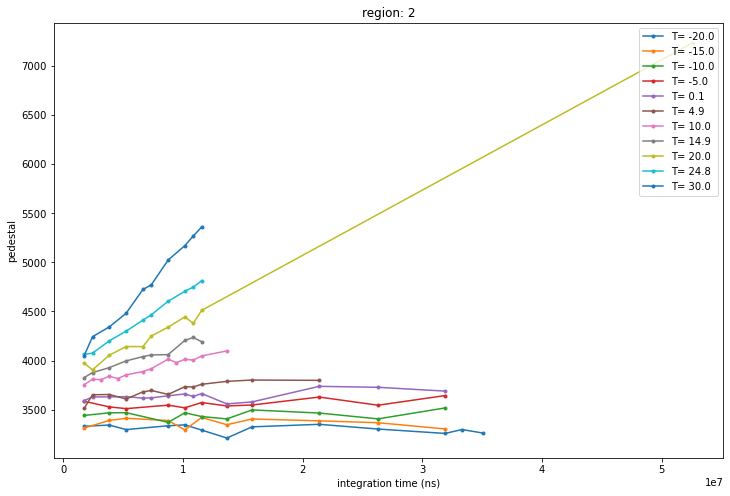

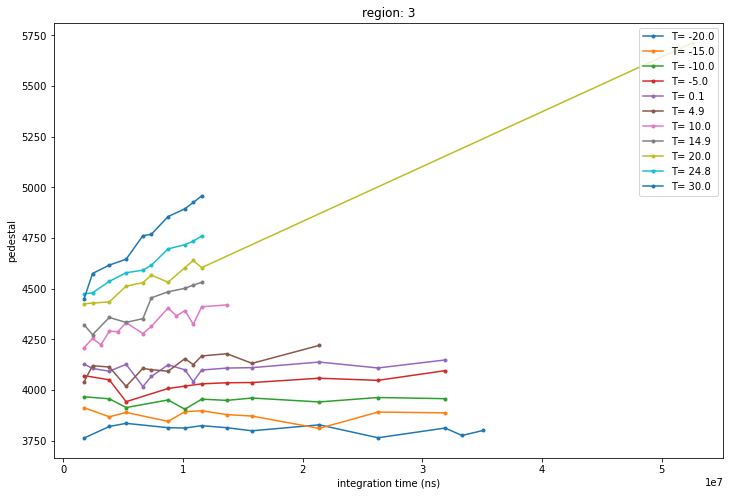

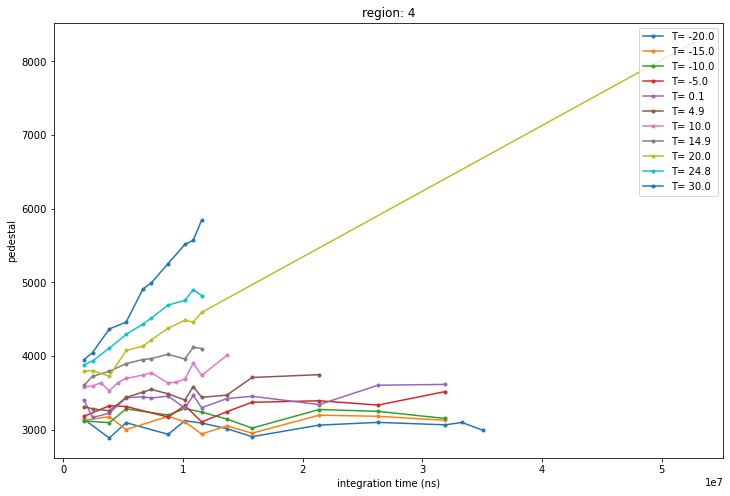

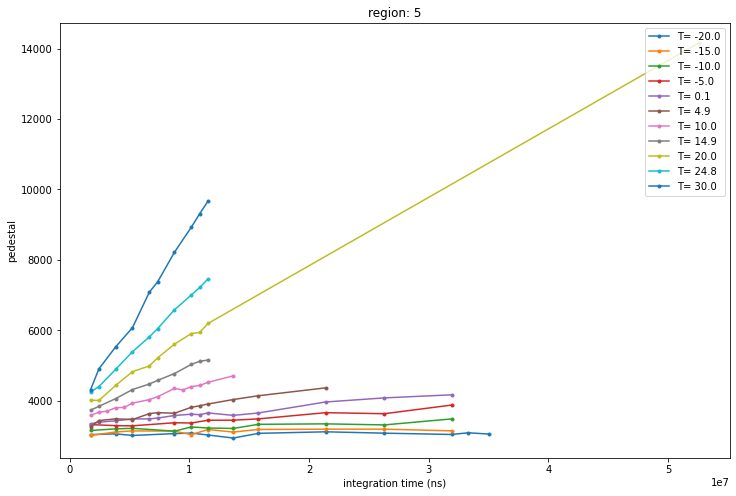

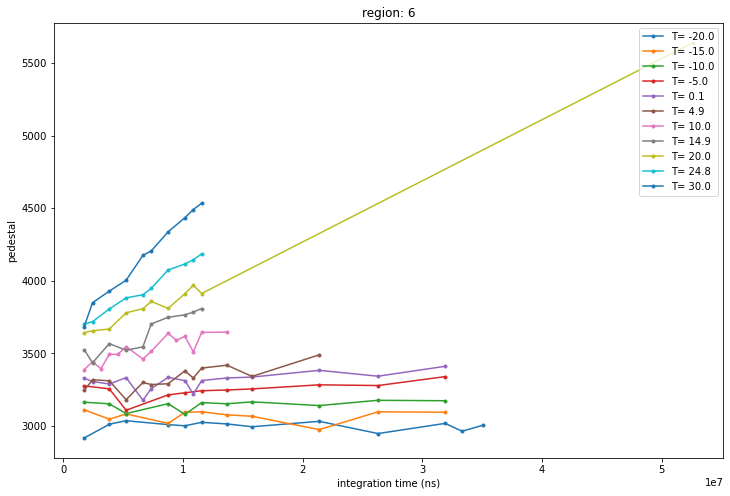

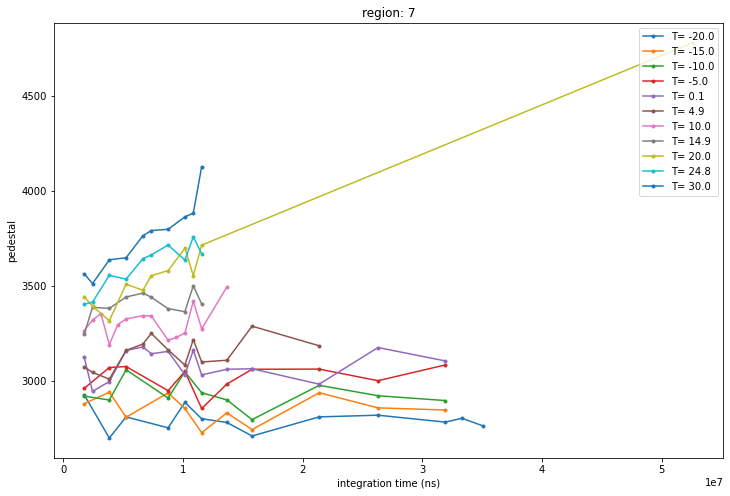

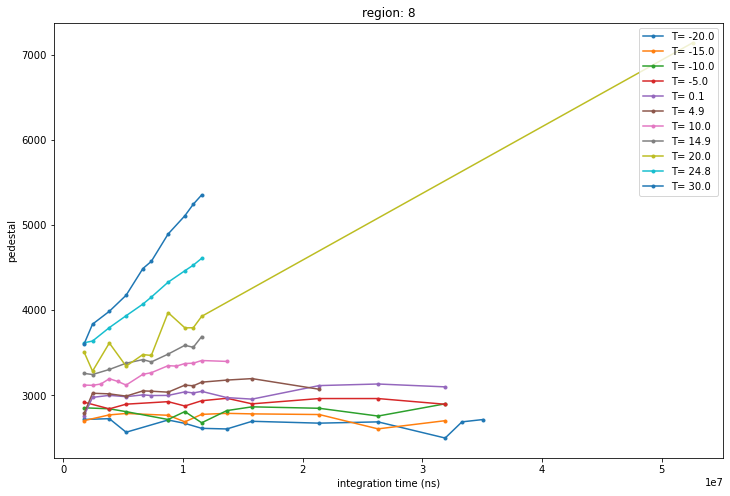

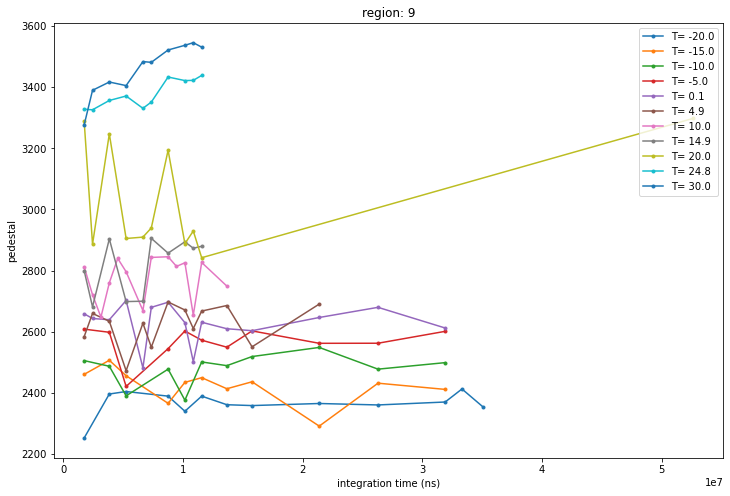

In [51]:
for r in np.unique(rads):
    plt.figure(figsize=(12,8))
    for t in np.unique(Temps):
        plt.plot(ttints[np.argwhere(rads==r)][np.where(Temps[np.argwhere(rads==r)]==t)[0]], 
                 intensities[np.argwhere(rads==r)][np.where(Temps[np.argwhere(rads==r)]==t)[0]],
                 'o-',markersize=3,
                label = 'T= {}'.format(t))
        plt.title('region: {}'.format(r))
        plt.xlabel('integration time (ns)')
        plt.ylabel('pedestal')
    plt.legend(loc='upper right')
    plt.show()

In [52]:
df

,T,tint,region,pedestal,noise
0,0.1,15780960.0,1,3351.180175,12.651955
1,0.1,15780960.0,2,3578.153425,28.804374
2,0.1,15780960.0,3,4110.726300,11.085523
3,0.1,15780960.0,4,3456.772700,57.347065
4,0.1,15780960.0,5,3653.700500,34.765125
...,...,...,...,...,...
1156,10.0,5260320.0,5,3933.221475,35.730785
1157,10.0,5260320.0,6,3547.162013,46.272100
1158,10.0,5260320.0,7,3325.263525,17.192318
1159,10.0,5260320.0,8,3119.314200,355.497021


In [52]:

ttints = []
Temps = []
rads = []
intensities = []
errors = []
for (T,r,t), group in df[(df['rad_dam']<15) & (df['T'].isin([-20.0, -10.0, 0.1, 10.0, 14.9]))].groupby(['T', 'rad_dam', 'tint']):
    #print(T,r,t,float(group['noise']), float(group['pedestal']))
    Temps.append(T)
    ttints.append(t)
    rads.append(r)
    intensities.append(float(group['pedestal']))
    errors.append(float(group['noise']))


In [53]:
ttints = np.array(ttints)
Temps = np.array(Temps)
rads = np.array(rads)
intensities = np.array(intensities)
errors = np.array(errors)

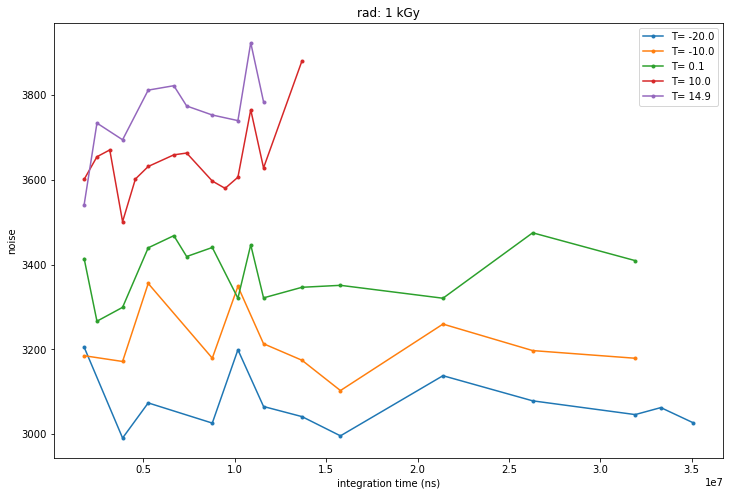

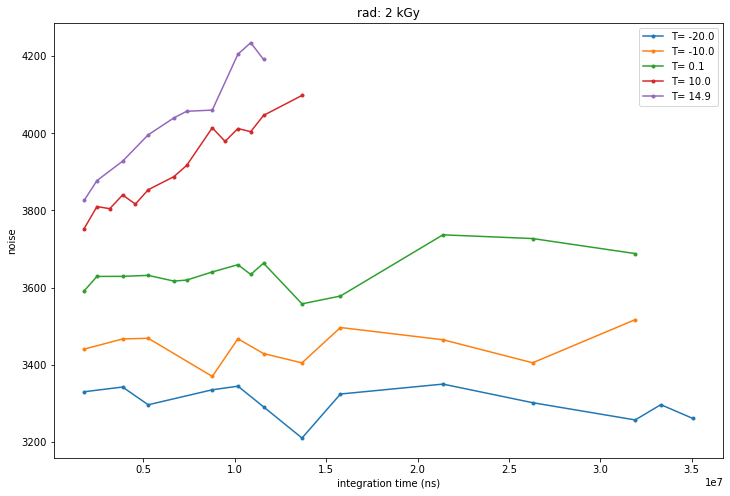

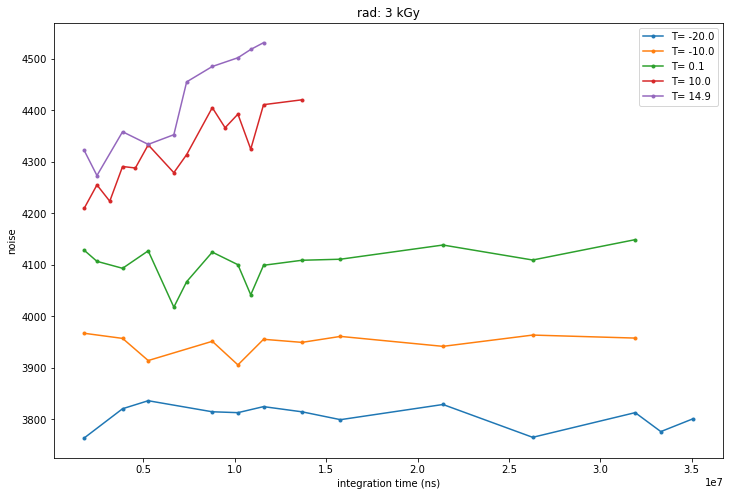

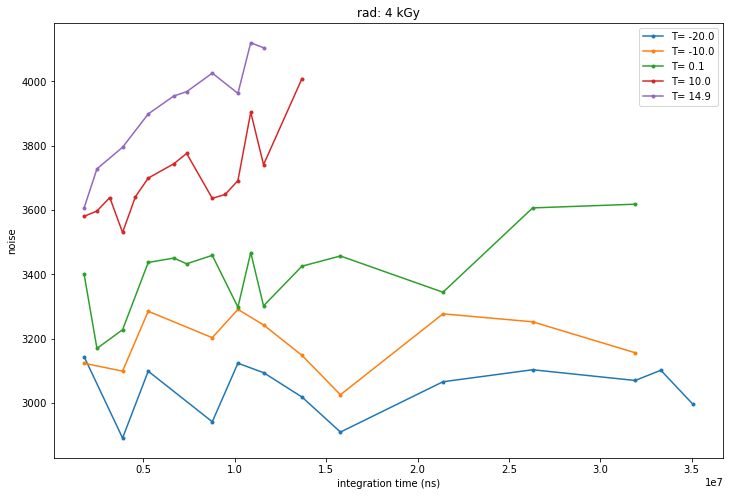

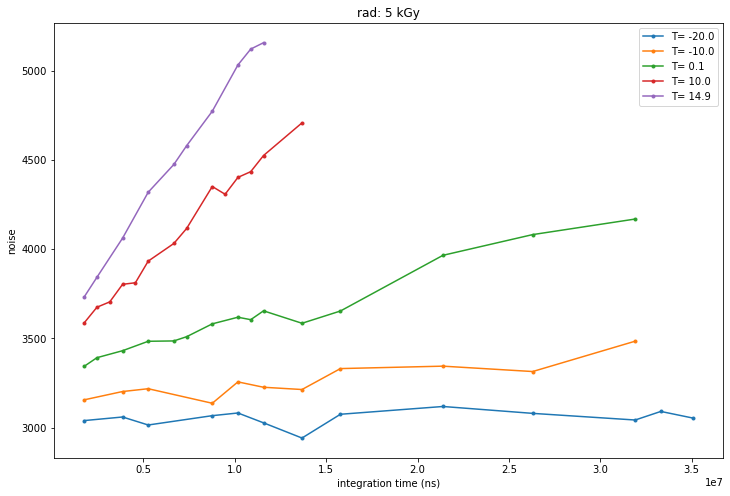

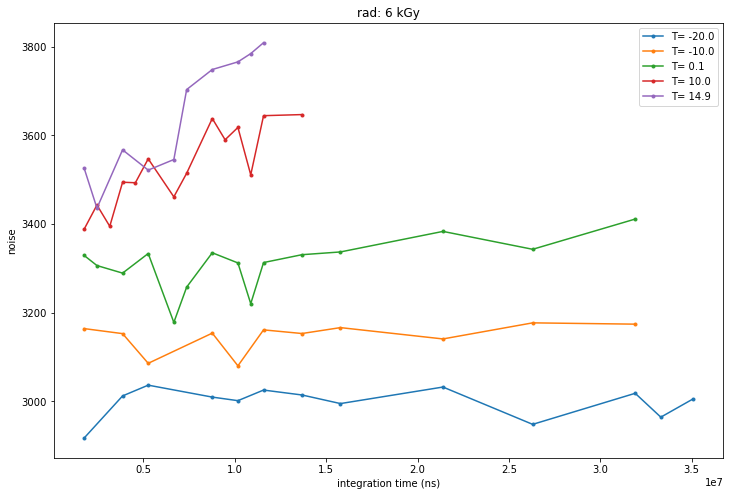

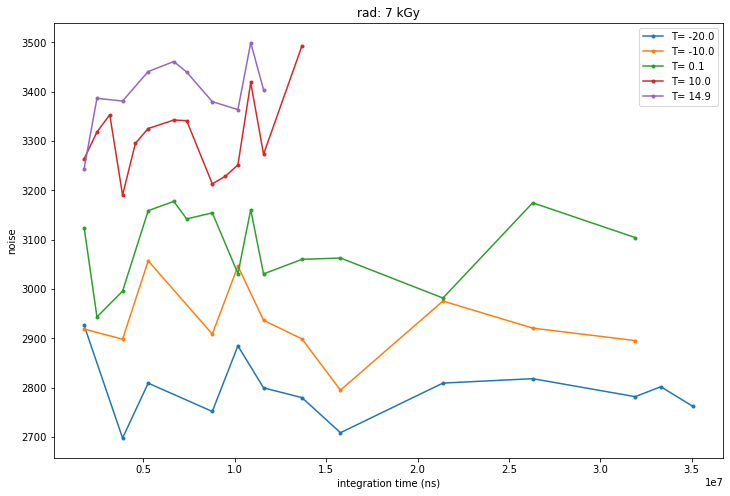

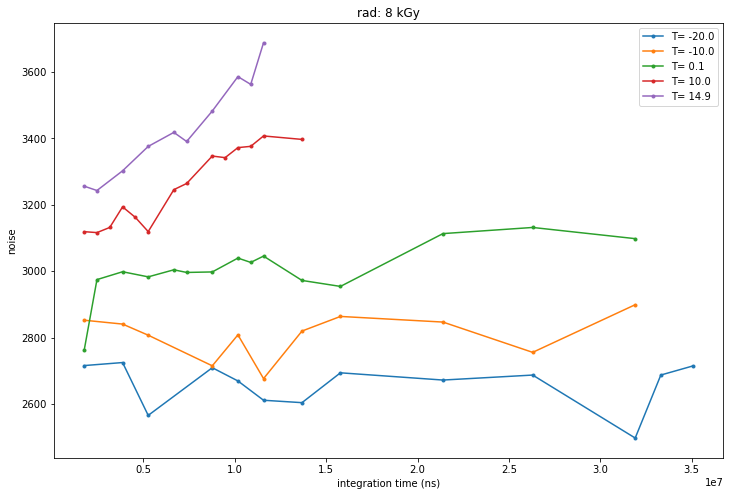

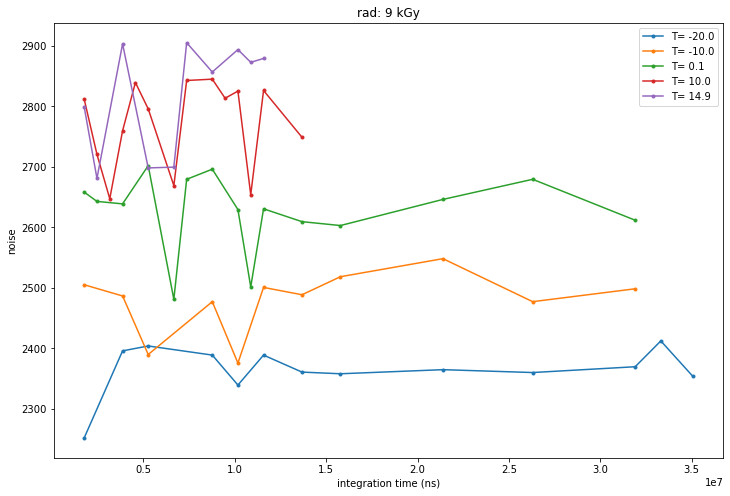

In [54]:
for r in np.unique(rads):
    plt.figure(figsize=(12,8))
    for t in np.unique(Temps):
        plt.plot(ttints[np.argwhere(rads==r).ravel()][np.where(Temps[np.argwhere(rads==r).ravel()]==t)[0]], 
                 intensities[np.argwhere(rads==r).ravel()][np.where(Temps[np.argwhere(rads==r).ravel()]==t)[0]],
                 'o-',markersize=3,
                label = 'T= {}'.format(t))
        plt.title('rad: {} kGy'.format(r))
        plt.xlabel('integration time (ns)')
        plt.ylabel('noise')
#         plt.ylim(0,3500)
    plt.legend(loc='upper right')
    plt.show()

In [53]:
for r in np.unique(rads):
    plt.figure(figsize=(12,8))
    for t in np.unique(Temps):
        
        plt.plot(tints[np.argwhere(rads==r)][np.where(Temps[np.argwhere(rads==r)]==t)[0]], 
                 intensities[np.argwhere(rads==r)][np.where(Temps[np.argwhere(rads==r)]==t)[0]],
                 'o-',markersize=3,
                label = 'T= {}'.format(t))
        plt.title('region: {}'.format(r))
        plt.xlabel('integration time (ns)')
        plt.ylabel('pedestal')
    plt.legend(loc='upper right')
    plt.show()
    #plt.savefig('pedestal_vs_tint_5_temperatures_{}nodamage.png'.format(r))

IndexError: index 216 is out of bounds for axis 0 with size 129

<Figure size 864x576 with 0 Axes>